## Overview
* 21卒ユーザー登録者数: 1248
* メールアドレス確認突破人数: 1227
* プロフィール登録突破人数: 1218

![](plot.png)

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import matplotlib.ticker as ticker

# df = pd.read_csv('21卒学生リスト_-_クリエイティブ職_2020_07_06-v2.csv')
df = pd.read_csv('21卒学生リスト_-_クリエイティブ職_2020_07_10-v2.csv')
df['resume_count'] = sum([df['skill_count'], df['training_count'], df['portfolio_count']])
df['active_count'] = sum([df['entry_count'], df['intern_count'], df['status_count']])
# df.created_at = pd.to_datetime(df.created_at, utc=True)
# df.index = pd.DatetimeIndex(df.created_at, name="created_at")
# df.index = df.index.tz_convert('Asia/Tokyo')


df.describe()

,public_id,entry_count,intern_count,training_count,status_count,portfolio_count,skill_count,resume_count,active_count
count,7.810000e+02,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000
mean,5.176846e+08,0.192061,0.138284,0.857875,0.135723,0.321383,1.459667,2.638924,0.466069
std,2.896457e+08,1.099645,0.589508,2.730461,0.440881,1.223872,3.201358,5.526182,1.600621
min,8.613620e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.727923e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.406052e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.715358e+08,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,3.000000,0.000000
max,9.977214e+08,21.000000,8.000000,39.000000,3.000000,15.000000,41.000000,56.000000,23.000000


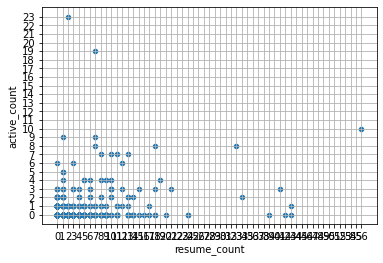

In [18]:
import numpy as np

x = df['resume_count']
y = df['active_count']

plt.scatter(x, y, 20)
plt.xlabel('resume_count')
plt.ylabel('active_count')

plt.xticks(np.arange(min(x), max(x)+1, 1))
plt.yticks(np.arange(min(y), max(y)+1, 1))


plt.grid(True)
plt.show()

In [19]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure 
output_notebook()


Loading BokehJS ...

In [20]:
p = figure(plot_width=600, plot_height=600)
p.circle(x=x, y=y, size=8)

p.line([2, 2], [-2, 20], color="red")
p.line([-10, 80], [1, 1], color="red")

p.line([8, 8], [-2, 20], color="red")
p.line([-10, 80], [3, 3], color="red")



show(p)

In [21]:
group_x = df.query('resume_count < 1 and active_count < 1')
group_x.to_csv('group_x.csv')
group_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 346 entries, 0 to 770
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   email            346 non-null    object
 1   family_name      346 non-null    object
 2   first_name       346 non-null    object
 3   public_id        346 non-null    int64 
 4   last_sign_in_at  28 non-null     object
 5   appeal           109 non-null    object
 6   history          307 non-null    object
 7   interest         307 non-null    object
 8   entry            0 non-null      object
 9   entry_count      346 non-null    int64 
 10  intern           0 non-null      object
 11  intern_count     346 non-null    int64 
 12  training         0 non-null      object
 13  training_count   346 non-null    int64 
 14  contacts         0 non-null      object
 15  status           0 non-null      object
 16  status_count     346 non-null    int64 
 17  希望職種             346 non-null    ob

In [22]:
group_y = df.query('resume_count < 1 and active_count > 0')
group_y.to_csv('group_y.csv')
group_y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 21 to 738
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   email            48 non-null     object
 1   family_name      48 non-null     object
 2   first_name       48 non-null     object
 3   public_id        48 non-null     int64 
 4   last_sign_in_at  1 non-null      object
 5   appeal           28 non-null     object
 6   history          46 non-null     object
 7   interest         46 non-null     object
 8   entry            7 non-null      object
 9   entry_count      48 non-null     int64 
 10  intern           28 non-null     object
 11  intern_count     48 non-null     int64 
 12  training         0 non-null      object
 13  training_count   48 non-null     int64 
 14  contacts         21 non-null     object
 15  status           21 non-null     object
 16  status_count     48 non-null     int64 
 17  希望職種             48 non-null     ob

In [23]:
group_z = df.query('resume_count > 0 and active_count < 1')
group_z.to_csv('group_z.csv')
group_z.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290 entries, 1 to 780
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   email            290 non-null    object
 1   family_name      290 non-null    object
 2   first_name       290 non-null    object
 3   public_id        290 non-null    int64 
 4   last_sign_in_at  61 non-null     object
 5   appeal           88 non-null     object
 6   history          265 non-null    object
 7   interest         265 non-null    object
 8   entry            0 non-null      object
 9   entry_count      290 non-null    int64 
 10  intern           0 non-null      object
 11  intern_count     290 non-null    int64 
 12  training         209 non-null    object
 13  training_count   290 non-null    int64 
 14  contacts         0 non-null      object
 15  status           0 non-null      object
 16  status_count     290 non-null    int64 
 17  希望職種             290 non-null    ob

In [24]:
group_t = df.query('resume_count > 0 and active_count > 0')
group_t.to_csv('group_t.csv')
group_t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97 entries, 29 to 775
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   email            97 non-null     object
 1   family_name      97 non-null     object
 2   first_name       97 non-null     object
 3   public_id        97 non-null     int64 
 4   last_sign_in_at  31 non-null     object
 5   appeal           62 non-null     object
 6   history          97 non-null     object
 7   interest         97 non-null     object
 8   entry            45 non-null     object
 9   entry_count      97 non-null     int64 
 10  intern           41 non-null     object
 11  intern_count     97 non-null     int64 
 12  training         74 non-null     object
 13  training_count   97 non-null     int64 
 14  contacts         60 non-null     object
 15  status           60 non-null     object
 16  status_count     97 non-null     int64 
 17  希望職種             97 non-null     ob